In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer 
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers.legacy import Adam, Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove 
import warnings 
warnings.filterwarnings("ignore")

## Loading the Data

For the train data

In [4]:
directory = "/Users/sourasishmondal/Desktop/chest_xray/train"

filepath = []
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory, fold)
    imgs = os.listdir(f_path)

    for img in imgs:
        img_path = os.path.join(f_path, img)
        filepath.append(img_path)
        label.append(fold)

# concat data paths with label
filePathSeries = pd.Series(filepath, name='filepath')
labelPathSeries = pd.Series(label, name='label')
train_path = pd.concat([filePathSeries, labelPathSeries], axis=1)    # concat filepath and folder label


In [5]:
filePathSeries

0       /Users/sourasishmondal/Desktop/chest_xray/trai...
1       /Users/sourasishmondal/Desktop/chest_xray/trai...
2       /Users/sourasishmondal/Desktop/chest_xray/trai...
3       /Users/sourasishmondal/Desktop/chest_xray/trai...
4       /Users/sourasishmondal/Desktop/chest_xray/trai...
                              ...                        
5211    /Users/sourasishmondal/Desktop/chest_xray/trai...
5212    /Users/sourasishmondal/Desktop/chest_xray/trai...
5213    /Users/sourasishmondal/Desktop/chest_xray/trai...
5214    /Users/sourasishmondal/Desktop/chest_xray/trai...
5215    /Users/sourasishmondal/Desktop/chest_xray/trai...
Name: filepath, Length: 5216, dtype: object

In [6]:
labelPathSeries

0       PNEUMONIA
1       PNEUMONIA
2       PNEUMONIA
3       PNEUMONIA
4       PNEUMONIA
          ...    
5211       NORMAL
5212       NORMAL
5213       NORMAL
5214       NORMAL
5215       NORMAL
Name: label, Length: 5216, dtype: object

In [7]:
train_path

,filepath,label
0,/Users/sourasishmondal/Desktop/chest_xray/trai...,PNEUMONIA
1,/Users/sourasishmondal/Desktop/chest_xray/trai...,PNEUMONIA
2,/Users/sourasishmondal/Desktop/chest_xray/trai...,PNEUMONIA
3,/Users/sourasishmondal/Desktop/chest_xray/trai...,PNEUMONIA
4,/Users/sourasishmondal/Desktop/chest_xray/trai...,PNEUMONIA
...,...,...
5211,/Users/sourasishmondal/Desktop/chest_xray/trai...,NORMAL
5212,/Users/sourasishmondal/Desktop/chest_xray/trai...,NORMAL
5213,/Users/sourasishmondal/Desktop/chest_xray/trai...,NORMAL
5214,/Users/sourasishmondal/Desktop/chest_xray/trai...,NORMAL


## Loading the data for Test Dataset

In [8]:
directory = "/Users/sourasishmondal/Desktop/chest_xray/test"

filepath = []
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory, fold)
    imgs = os.listdir(f_path)

    for img in imgs:
        img_path = os.path.join(f_path, img)
        filepath.append(img_path)
        label.append(fold)

# concat data paths with label
filePathSeries = pd.Series(filepath, name='filepath')
labelPathSeries = pd.Series(label, name='label')
test_path = pd.concat([filePathSeries, labelPathSeries], axis=1)    # concat filepath and folder label


In [9]:
filePathSeries

0      /Users/sourasishmondal/Desktop/chest_xray/test...
1      /Users/sourasishmondal/Desktop/chest_xray/test...
2      /Users/sourasishmondal/Desktop/chest_xray/test...
3      /Users/sourasishmondal/Desktop/chest_xray/test...
4      /Users/sourasishmondal/Desktop/chest_xray/test...
                             ...                        
619    /Users/sourasishmondal/Desktop/chest_xray/test...
620    /Users/sourasishmondal/Desktop/chest_xray/test...
621    /Users/sourasishmondal/Desktop/chest_xray/test...
622    /Users/sourasishmondal/Desktop/chest_xray/test...
623    /Users/sourasishmondal/Desktop/chest_xray/test...
Name: filepath, Length: 624, dtype: object

In [10]:
labelPathSeries

0      PNEUMONIA
1      PNEUMONIA
2      PNEUMONIA
3      PNEUMONIA
4      PNEUMONIA
         ...    
619       NORMAL
620       NORMAL
621       NORMAL
622       NORMAL
623       NORMAL
Name: label, Length: 624, dtype: object

In [11]:
test_path.sample(5)

,filepath,label
43,/Users/sourasishmondal/Desktop/chest_xray/test...,PNEUMONIA
287,/Users/sourasishmondal/Desktop/chest_xray/test...,PNEUMONIA
531,/Users/sourasishmondal/Desktop/chest_xray/test...,NORMAL
111,/Users/sourasishmondal/Desktop/chest_xray/test...,PNEUMONIA
609,/Users/sourasishmondal/Desktop/chest_xray/test...,NORMAL


### Shape

In [12]:
print(f"The shape of the train dataset is: {train_path.shape}")
print(f"The shape of the test dataset is: {test_path.shape}")

The shape of the train dataset is: (5216, 2)
The shape of the test dataset is: (624, 2)


# Splitting Train, Test and Validation datasets

In [14]:
# Data directory
train_directory = "/Users/sourasishmondal/Desktop/chest_xray/train"
test_directory = "/Users/sourasishmondal/Desktop/chest_xray/test"

IMG_SIZE = (256, 256)

print("Training Images: ");

# Creating the training dataset
train_ds = keras.utils.image_dataset_from_directory(
    train_directory,
    validation_split=0.1,
    subset="training",
    image_size=IMG_SIZE,
    batch_size=32,
    seed=123
)

# Creating the validation data
print("Validation Images: ");
validation_ds = keras.utils.image_dataset_from_directory(
    train_directory,
    validation_split=0.1,
    subset="validation",
    image_size=IMG_SIZE,
    batch_size=32,
    seed=123
)

print("Testing Images: ");
test_ds = keras.utils.image_dataset_from_directory(
    test_directory,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=32
)

Training Images: 
Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Validation Images: 
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Testing Images: 
Found 624 files belonging to 2 classes.


## Extracting the labels

In [15]:
train_label = train_ds.class_names
test_label = test_ds.class_names
validation_label = validation_ds.class_names

In [16]:
train_label
test_label
validation_label

['NORMAL', 'PNEUMONIA']

## Encode Label

In [17]:
# defining the class labels

class_labels = ['NORMAL', 'PNEUMONIA']

# using labelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(class_labels)   # fit label encoder on the class labels

# transform the labels for training dataset
train_labels_encoded = label_encoder.transform(train_label)

# transform the labels for testing dataset
test_labels_encoded = label_encoder.transform(test_label)

# transform the labels for validation dataset
validation_labels_encoded = label_encoder.transform(validation_label)

In [18]:
print(train_labels_encoded)
print(test_labels_encoded)
print(validation_labels_encoded)

[0 1]
[0 1]
[0 1]


In [19]:
# Shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)      # X_Train
    print("Shape of Y_train: ", labels_batch.shape)     # Y_Train
    break

Shape of X_train:  (32, 256, 256, 3)
Shape of Y_train:  (32,)


# Normalization

### normalizing pixel values

In [20]:
# Train Data
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Validation Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))
#Test Data
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

## Visualizing Count & Distribution of Train Label

In [21]:
count_train = train_path['label'].value_counts()   # counting the number of occurence of train labels

In [22]:
count_train

label
PNEUMONIA    3875
NORMAL       1341
Name: count, dtype: int64

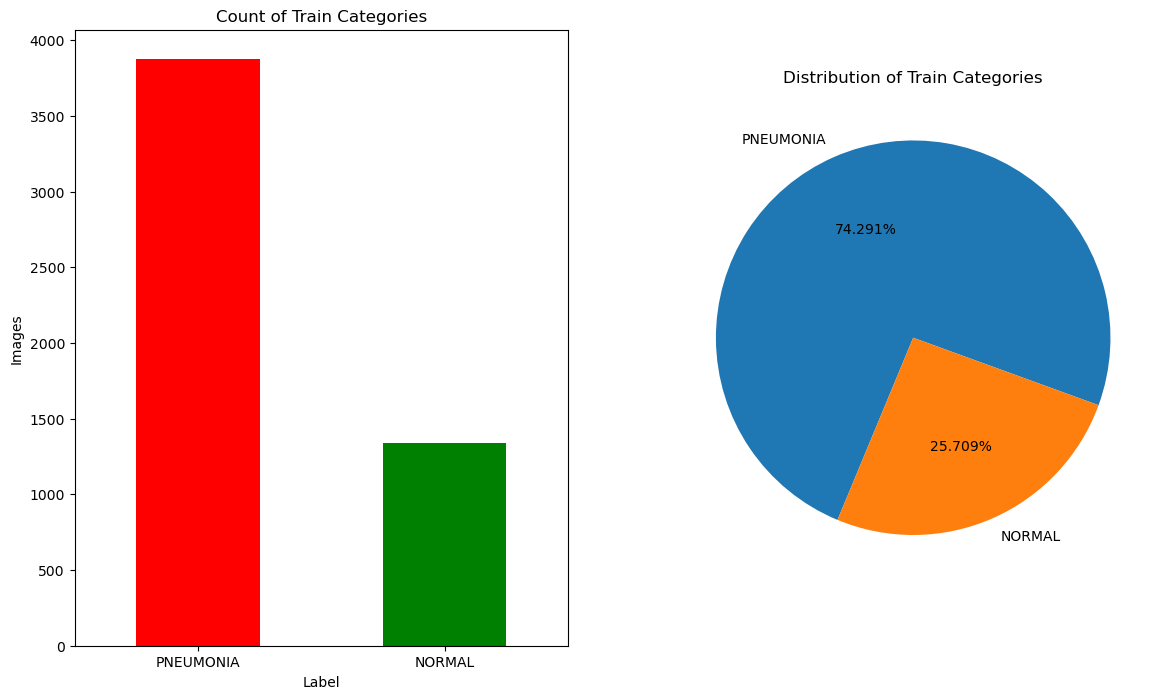

In [23]:
# creating the region for two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 8), facecolor='white')

#plotting the bar graph on first plot
colors = ['red', 'green']
count_train.plot(kind='bar', color=colors, ax=axs[0])
axs[0].set_xticklabels(count_train.index, rotation=0)
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Images")
axs[0].set_title("Count of Train Categories")


#plotting the pie chart on second plot
axs[1].set_title("Distribution of Train Categories")
sns.set_palette(colors)
axs[1].pie(count_train, labels=count_train.index, autopct='%1.3f%%', startangle=340)

# showing the plot
plt.show()


## Visualizing Count & Distribution of Test Label

In [24]:
count_test = test_path['label'].value_counts()
count_test

label
PNEUMONIA    390
NORMAL       234
Name: count, dtype: int64

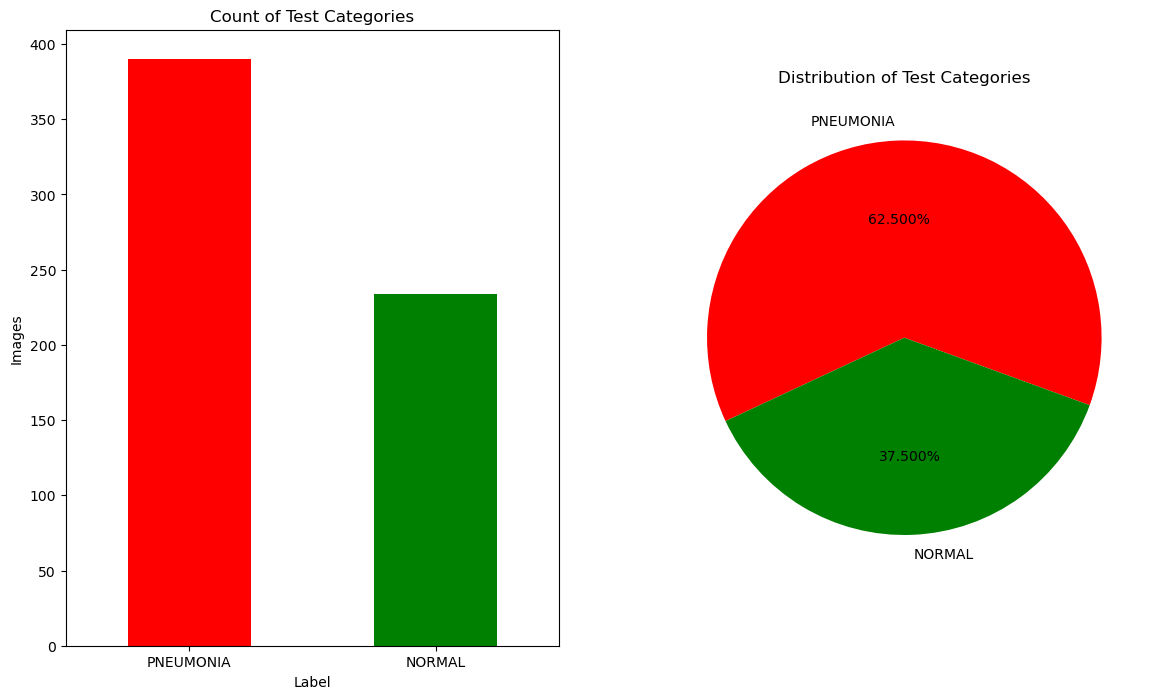

In [25]:
# creating the region for two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 8), facecolor='white')

#plotting the bar graph on first plot
colors = ['red', 'green']
count_test.plot(kind='bar', color=colors, ax=axs[0])
axs[0].set_xticklabels(count_test.index, rotation=0)
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Images")
axs[0].set_title("Count of Test Categories")


#plotting the pie chart on second plot
axs[1].set_title("Distribution of Test Categories")
sns.set_palette(colors)
axs[1].pie(count_test, labels=count_test.index, autopct='%1.3f%%', startangle=340)

# showing the plot
plt.show()


## Visualizing Real Train Images

In [26]:
def real_image_visualization(path, num_images = 6):
    # getting the list of image filenames in the path
    image_filenames = os.listdir(path)

    # creating the region to plot the lungs images on 1st row with numImages set to any value but only upto 6
    fig, axes = plt.subplots(1, num_images, figsize=(20, 10), facecolor='white')

    # Loop over the images
    for i, image_filenames in enumerate(image_filenames[:num_images]):
        # Load the image
        image_path = os.path.join(path, image_filenames)   # here we combine the path and the filename into a single string
        loaded_image = mpimg.imread(image_path)    # it will load the image into a NumPy array for manipulation or display

        # Displaying the image
        axes[i].imshow(loaded_image, interpolation='nearest', cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(image_filenames)
    
    plt.tight_layout()
    plt.show()

# NORMAL Images Visualization

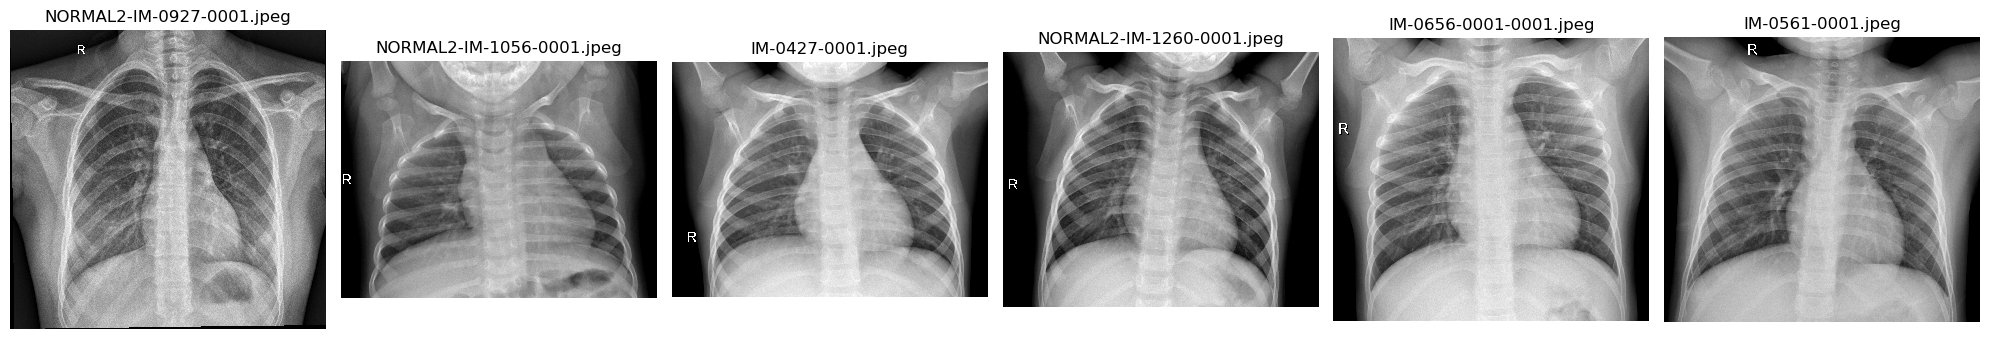

In [27]:
normal_images_path = '/Users/sourasishmondal/Desktop/chest_xray/train/NORMAL'

real_image_visualization(normal_images_path, num_images=6)

# Pneumonia Images Visualization

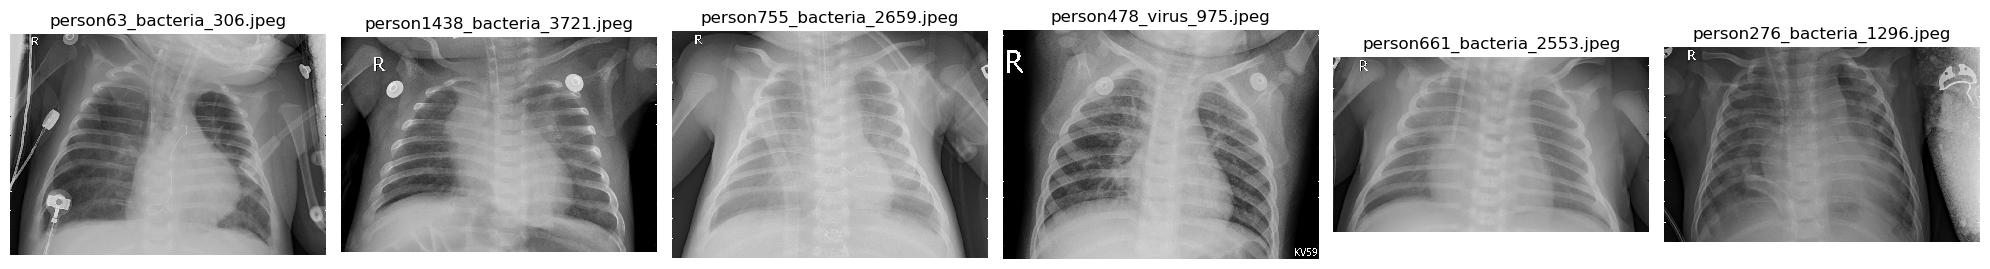

In [28]:
pneumonia_images_path = '/Users/sourasishmondal/Desktop/chest_xray/train/PNEUMONIA'

real_image_visualization(pneumonia_images_path, num_images=6)

# MODEL SECTION

In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Fitting the model
history = model.fit(train_ds, epochs=20, validation_data=validation_ds, callbacks=early_stopping)

In [7]:
# loading the XCeption model without top classification layer

base_xception_model = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(256, 256, 3))
base_xception_model.trainable = False

model = Sequential()
model.add(base_xception_model)
model.add(BatchNormalization())
model.add(Dropout(0.45))

# Dense Layer 1
model.add(Dense(220, activation='leaky_relu'))
model.add(Dropout(0.25))

# Dense Layer 2
model.add(Dense(60, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile

model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_9 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 220)               450780    
                                                                 
 dropout_3 (Dropout)         (None, 220)               0         
                                                                 
 dense_4 (Dense)             (None, 60)                13260     
                                                      

In [45]:
base_xception_model = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(256, 256, 3))
base_xception_model.trainable = False

model = Sequential()
model.add(base_xception_model)
model.add(BatchNormalization())
model.add(Dropout(0.45))

# Dense Layer 1
model.add(Dense(220, activation='leaky_relu'))
model.add(Dropout(0.25))

# Dense Layer 2
model.add(Dense(60, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Fitting the model
history = model.fit(train_ds, epochs=20, validation_data=validation_ds, callbacks=early_stopping)

Epoch 1/20
147/147 [==============================] - 212s 1s/step - loss: 0.1988 - accuracy: 0.9276 - val_loss: 0.1555 - val_accuracy: 0.9328
Epoch 2/20
147/147 [==============================] - 219s 1s/step - loss: 0.1312 - accuracy: 0.9521 - val_loss: 0.0932 - val_accuracy: 0.9693
Epoch 3/20
147/147 [==============================] - 216s 1s/step - loss: 0.1196 - accuracy: 0.9608 - val_loss: 0.0780 - val_accuracy: 0.9674
Epoch 4/20
147/147 [==============================] - 213s 1s/step - loss: 0.0966 - accuracy: 0.9653 - val_loss: 0.0630 - val_accuracy: 0.9789
Epoch 5/20
147/147 [==============================] - 213s 1s/step - loss: 0.0884 - accuracy: 0.9659 - val_loss: 0.0661 - val_accuracy: 0.9750
Epoch 6/20
147/147 [==============================] - 212s 1s/step - loss: 0.0828 - accuracy: 0.9672 - val_loss: 0.0700 - val_accuracy: 0.9731
Epoch 7/20
147/147 [==============================] - 204s 1s/step - loss: 0.0728 - accuracy: 0.9725 - val_loss: 0.0760 - val_accuracy: 0.9674

In [41]:
with tf.device('/GPU:0'):
    # Your TensorFlow operations here will run on GPU:0
    # For example, creating a tensor
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

# Check the device that the tensor 'a' is placed on
print(a.device)

/job:localhost/replica:0/task:0/device:GPU:0


In [46]:
val_loss, val_acc = model.evaluate(validation_ds)

print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_acc)

17/17 [==============================] - 19s 1s/step - loss: 0.0630 - accuracy: 0.9789
Validation Loss:  0.0629533901810646
Validation Accuracy:  0.9788867831230164


In [71]:
high_val_acc_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

In [72]:
print(high_val_acc_epoch)

4


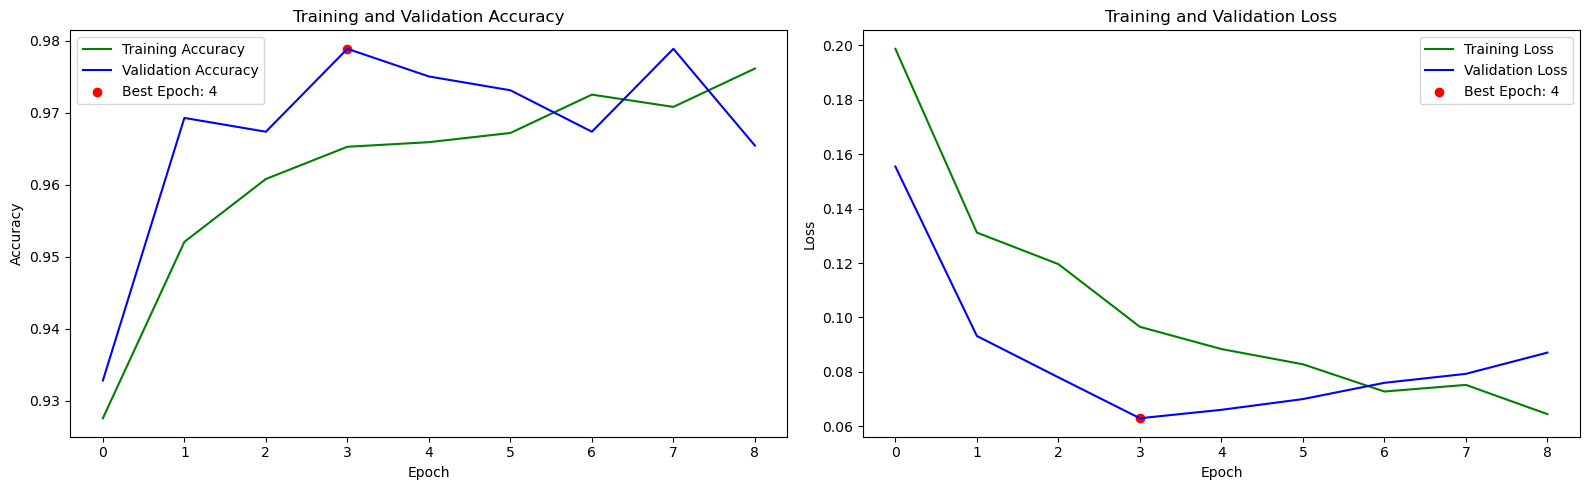

In [84]:
plt.style.use('default')

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# printing the graph of accuracty
axs[0].plot(history.history['accuracy'], label="Training Accuracy", color='green')
axs[0].plot(history.history['val_accuracy'], label="Validation Accuracy", color='blue')
axs[0].scatter(high_val_acc_epoch - 1, history.history['val_accuracy'][high_val_acc_epoch - 1], color='red', label=f"Best Epoch: {high_val_acc_epoch}")
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

#printing loss 
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].plot(history.history['loss'], label="Training Loss", color='green')
axs[1].plot(history.history['val_loss'], label="Validation Loss", color='blue')
axs[1].scatter(high_val_acc_epoch - 1, history.history['val_loss'][high_val_acc_epoch - 1], color='red', label=f"Best Epoch: {high_val_acc_epoch}")
axs[1].legend()

plt.tight_layout()
plt.show()

In [57]:
model.save('xception_pneumonia.model')

INFO:tensorflow:Assets written to: xception_pneumonia.model/assets


INFO:tensorflow:Assets written to: xception_pneumonia.model/assets


In [58]:
new_model = keras.models.load_model('xception_pneumonia.model/')